In [1]:
import pandas as pd

import glob

path='saidas_GPU_local/'

files = [f for f in glob.glob(path + "*.out", recursive=True)]

for f in files:
    print(f)

saidas_GPU_local/OCL-GPU_32-08_B_BasketballDrive_1920x1080_50_RA_27_0.out
saidas_GPU_local/OCL-GPU_64-16_B_BasketballDrive_1920x1080_50_RA_27_0.out
saidas_GPU_local/OCL-GPU_64-08_E_KristenAndSara_1280x720_60_LD_32_0.out
saidas_GPU_local/OCL-GPU_32-32_B_Kimono_1920x1080_24_RA_32_0.out
saidas_GPU_local/OCL-GPU_64-16_E_KristenAndSara_1280x720_60_RA_22_0.out
saidas_GPU_local/OCL-GPU_32-16_E_Johnny_1280x720_60_RA_32_0.out
saidas_GPU_local/OCL-GPU_64-32_B_ParkScene_1920x1080_24_RA_27_0.out
saidas_GPU_local/OCL-GPU_16-08_E_KristenAndSara_1280x720_60_LD_22_0.out
saidas_GPU_local/OCL-GPU_32-08_B_ParkScene_1920x1080_24_RA_32_0.out
saidas_GPU_local/OCL-GPU_16-08_B_Cactus_1920x1080_50_LD_37_0.out
saidas_GPU_local/OCL-GPU_16-08_E_KristenAndSara_1280x720_60_LD_32_0.out
saidas_GPU_local/OCL-GPU_16-08_E_Johnny_1280x720_60_RA_27_0.out
saidas_GPU_local/OCL-GPU_16-16_E_Johnny_1280x720_60_RA_37_0.out
saidas_GPU_local/OCL-GPU_32-32_B_BasketballDrive_1920x1080_50_RA_37_0.out
saidas_GPU_local/OCL-GPU_32-32_E

In [2]:
def getData(f):
    dict_temp = {}
    fp = open(f,'r')
    for line in fp:
        if "ERROR" not in line and line != '\n':
            key = line.split(":")[0]
            value = float(line.split(":")[1].split("\n")[0])
            dict_temp[key] = value
            if f.split('/')[1][0] == "C":
                if key == "tMCLuma_clk":
                    dict_temp['name'] = f.split('/')[1]
                    return dict_temp
            if f.split('/')[1][0] == "O":
                if key == "tOutput_cout":
                    dict_temp['name'] = f.split('/')[1]
                    return dict_temp
                    
    

In [15]:
df = pd.DataFrame()

for f in files:
    df = df.append(getData(f), ignore_index = True)

df = df.set_index('name')    
df

,Frames,Frames_cout,TotalDe265,TotalDe265_cout,fps,fps_cout,tInput,tInput_cout,tKernel,tKernel_cout,...,txFracl,txFracl_cout,tyFracl,tyFracl_cout,tGenerateInterPredictionSamples,tGenerateInterPredictionSamples_clk,tMCLuma,tMCLuma_clk,tReadCodingUnit,tReadCodingUnit_clk
name,,,,,,,,,,,,,,,,,,,,,
OCL-GPU_32-08_B_BasketballDrive_1920x1080_50_RA_27_0.out,10.0,10.0,3.88755,3.887550,2.57,2.57231,0.014566,0.014566,0.323780,0.323780,...,0.012286,0.012286,0.012263,0.012263,NaN,NaN,NaN,NaN,NaN,NaN
OCL-GPU_64-16_B_BasketballDrive_1920x1080_50_RA_27_0.out,10.0,10.0,3.56610,3.566100,2.80,2.80419,0.017171,0.017171,0.311509,0.311509,...,0.010288,0.010288,0.010255,0.010255,NaN,NaN,NaN,NaN,NaN,NaN
OCL-GPU_64-08_E_KristenAndSara_1280x720_60_LD_32_0.out,10.0,10.0,0.81622,0.816223,12.25,12.25160,0.005481,0.005481,0.085815,0.085815,...,0.002965,0.002965,0.002950,0.002950,NaN,NaN,NaN,NaN,NaN,NaN
OCL-GPU_32-32_B_Kimono_1920x1080_24_RA_32_0.out,10.0,10.0,2.89615,2.896150,3.45,3.45286,0.008885,0.008885,0.195169,0.195169,...,0.005387,0.005387,0.005384,0.005384,NaN,NaN,NaN,NaN,NaN,NaN
OCL-GPU_64-16_E_KristenAndSara_1280x720_60_RA_22_0.out,10.0,10.0,1.60871,1.608710,6.22,6.21616,0.008696,0.008696,0.157402,0.157402,...,0.005324,0.005324,0.005289,0.005289,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCL-GPU_64-64_B_ParkScene_1920x1080_24_RA_32_0.out,10.0,10.0,2.42483,2.424830,4.12,4.12400,0.008352,0.008352,0.082377,0.082377,...,0.002467,0.002467,0.002473,0.002473,NaN,NaN,NaN,NaN,NaN,NaN
OCL-GPU_32-08_E_FourPeople_1280x720_60_RA_37_0.out,10.0,10.0,0.60729,0.607291,16.47,16.46660,0.002009,0.002009,0.046338,0.046338,...,0.001797,0.001797,0.001779,0.001779,NaN,NaN,NaN,NaN,NaN,NaN
OCL-GPU_16-16_E_FourPeople_1280x720_60_LD_32_0.out,10.0,10.0,0.43711,0.437109,22.88,22.87760,0.001099,0.001099,0.026936,0.026936,...,0.001098,0.001098,0.001092,0.001092,NaN,NaN,NaN,NaN,NaN,NaN


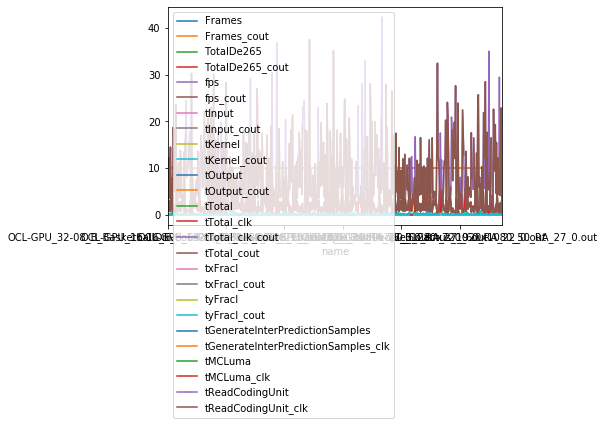

In [16]:
df.plot()